# EDA USER_REVIEWS

Nota: es importante realizar los procesos de ETL en la carpeta ./ETL/ y el de Feature Engineering en la carpeta ./Feature Engineering/ para realizar este paso.

En este archivo se desarrollará el EDA completo INDIVIDIAL para los elementos de, archivo resultante de user_reviews.

## Importar Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

# Ignorar advertencias
warnings.filterwarnings('ignore')

### importar funciones personalizadas de ../functions/EDA.py

In [2]:
# Obtener el directorio de trabajo actual
current_dir = os.getcwd()

# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Agregar la ruta del proyecto al sys.path
sys.path.append(project_root)

In [3]:
# importar función personalizada de ./VideoGameRecommender/functions/EDA.py
# Esta función permite traer el archivo en el formato que se encuentre (CSV o Parquet)
from functions.EDA import get_file, get_frequency

## Análisis Exploratorio de Datos

Se realiza el Análisis Exploratorio de Datos en user_review revisando elemento por elemento.

### Revisión general

In [4]:
# utilizamos la función get_file(file_name) importada desde ../functions/EDA.py para traer el dataset
df = get_file('user_reviews_sentiment_analysis')

# visualizar las primeras tres filas del dataframe
df.head(3)

,user_id,posted,item_id,recommend,review
0,76561197970982479,2011-11-05,1250,1,2
1,76561197970982479,2011-07-15,22200,1,2
2,76561197970982479,2011-04-21,43110,1,2


In [5]:
# se verifican los nulos y los tipos de datos
print(df.isna().sum())
df.info()

user_id      0
posted       0
item_id      0
recommend    0
review       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    59305 non-null  object
 1   posted     59305 non-null  object
 2   item_id    59305 non-null  int64 
 3   recommend  59305 non-null  int64 
 4   review     59305 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


### Distribución de las variables categóricas - recommend

recommend
1    52473
0     6832
Name: count, dtype: int64


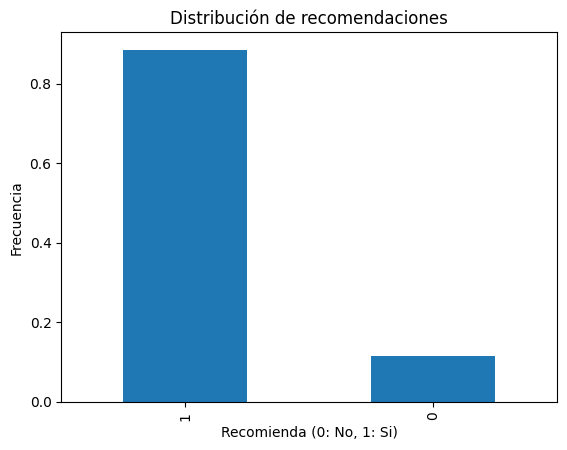

In [6]:
# se revisa la distribución de las recomendaciones de los usuarios con un gráfico de barras
df['recommend'].value_counts(normalize=True).plot(kind='bar')

plt.title('Distribución de recomendaciones')
plt.xlabel('Recomienda (0: No, 1: Si)')
plt.ylabel('Frecuencia')

# se visualizan los valores 0 y 1, primero la suma de cada uno, luego en la gráfica
print(df['recommend'].value_counts())
plt.show()

In [7]:
# se utiliza la función get_frequency(df, elem) del archivo ../functions/EDA.py para visualizar los porcentajes de frecuencia

get_frequency(df, 'recommend')

,recommend,frequency,percentage
0,1,52473,88.479892
1,0,6832,11.520108


### Distribución de las variables categóricas - review

review
2    46926
1     8601
0     3778
Name: count, dtype: int64


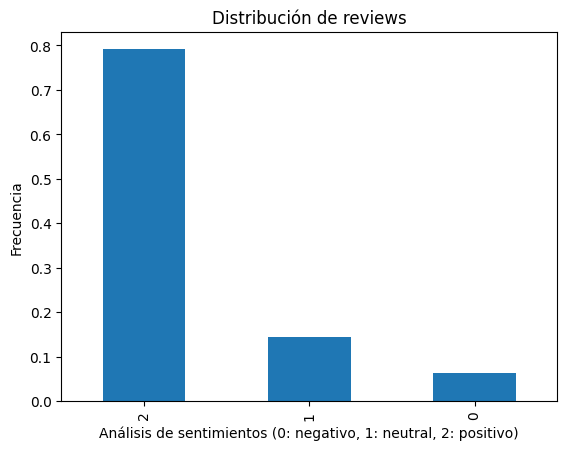

In [8]:
df['review'].value_counts(normalize=True).plot(kind='bar')

plt.title('Distribución de reviews')
plt.xlabel('Análisis de sentimientos (0: negativo, 1: neutral, 2: positivo)')
plt.ylabel('Frecuencia')

# se visualizan los valores 0, 1 y 2, primero la suma de cada uno, luego en la gráfica
print(df['review'].value_counts())
plt.show()

<b>Observaciones: </b> Se puede ver una gran variación entre los usuarios que recomiendan y los que no, siendo mayormente los que recomiendan.

In [9]:
# se utiliza la función get_frequency(df, elem) del archivo ../functions/EDA.py para visualizar los porcentajes de frecuencia

get_frequency(df, 'review')

,review,frequency,percentage
0,2,46926,79.126549
1,1,8601,14.502993
2,0,3778,6.370458


<b>Observaciones: </b> Al igual que en el caso de las recomendaciones, las gráficas están desbalanceadas.

Aunque la mayoría de los usuarios recomiendan los juegos (88.48%), los análisis de sentimiento muestran una tendencia hacia la neutralidad. Un 79.13% de las reviews son neutrales, lo que sugiere que, aunque los usuarios recomienden un juego, sus opiniones tienden a ser moderadas, sin una emoción claramente positiva o negativa.

### Análisis de Tendencias por Recomendación

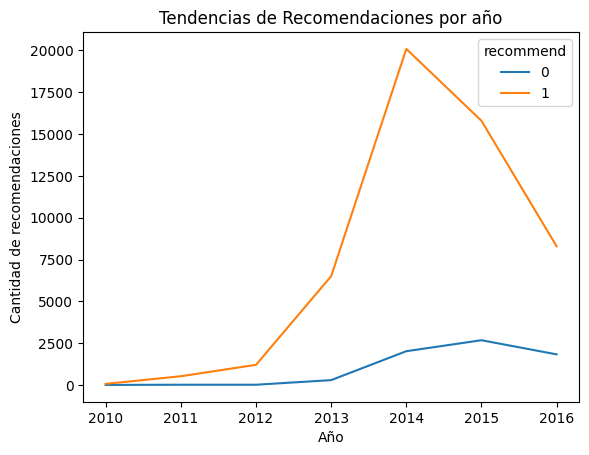

In [10]:
# Convertir la columna 'posted' a formato datetime
df['posted'] = pd.to_datetime(df['posted'], errors='coerce')

# se grafican las tendencias de recomendación por año
df.groupby([df['posted'].dt.year, 'recommend']).size().unstack().plot(kind='line')

plt.title('Tendencias de Recomendaciones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de recomendaciones')
plt.show()

Puede observarse que en 2014 se lega a un punto máximo de recomendaciones positivas que, comienza a disminuír bruscamente.

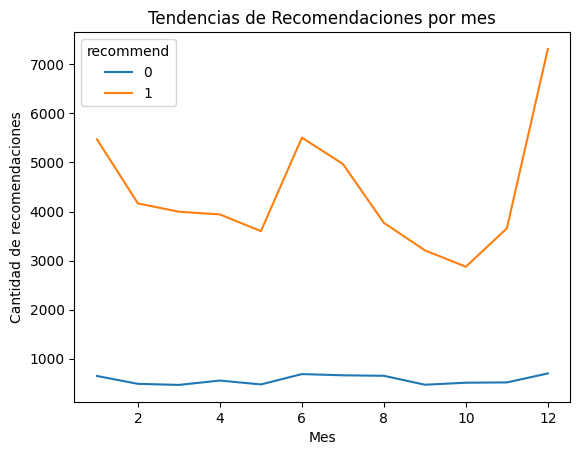

In [11]:
# se grafican las tendencias de recomendación pero, esta vez por meses
df.groupby([df['posted'].dt.month, 'recommend']).size().unstack().plot(kind='line')

plt.title('Tendencias de Recomendaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de recomendaciones')
plt.show()

Puede observarse que las recomendaciones tienden a incrementarse en Junio, Noviembre y Diciembre.

### Análisis de Tendencias por Análisis de Sentimientos (reviews)

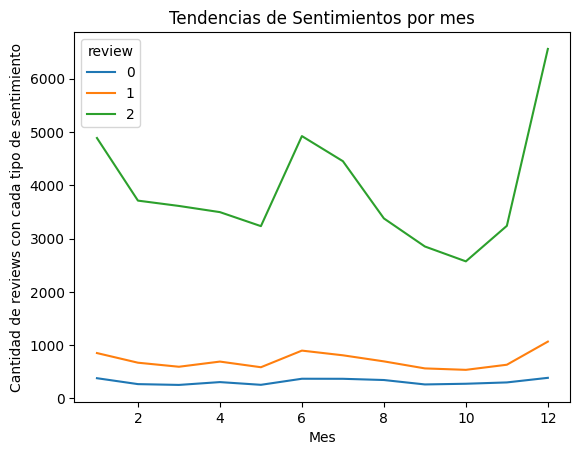

In [12]:
# se grafican las tendencias de las reviews por año
df.groupby([df['posted'].dt.month, 'review']).size().unstack().plot(kind='line')

plt.title('Tendencias de Sentimientos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de reviews con cada tipo de sentimiento')
plt.show()

### Análisis de usuarios

In [13]:
#Se utiliza la función get_frequency definida en el archivo ../functions/EDA.py para ver los usuarios qué mas han hecho recomendaciones en general y se visualizan
users = get_frequency(df, 'user_id')
users.head(10)

,user_id,frequency,percentage
0,76561198094665607,20,0.033724
1,dannysfatass,20,0.033724
2,76561198064484479,20,0.033724
3,chicken_tonight,20,0.033724
4,MIMMATA,20,0.033724
5,Letachal,20,0.033724
6,OfficialSenix,20,0.033724
7,Shredderman962,18,0.030352
8,nitr0ticwolf,18,0.030352
9,76561198044023118,18,0.030352


In [14]:
# se ven los usuarios que más recomendaciones positivas han necho
rec_pos = get_frequency(df[df['recommend'] == 1], 'user_id')
rec_pos.head(10)

,user_id,frequency,percentage
0,Letachal,20,0.038115
1,76561198064484479,20,0.038115
2,chicken_tonight,20,0.038115
3,dannysfatass,20,0.038115
4,MIMMATA,18,0.034303
5,76561198094665607,18,0.034303
6,76561198063316459,16,0.030492
7,norsktf,16,0.030492
8,76561198027488037,15,0.028586
9,Ranev,14,0.026680


In [15]:
# se ven los usuarios que más recomendaciones negativas han necho
rec_neg = get_frequency(df[df['recommend'] == 0], 'user_id')
rec_neg.head(10)

,user_id,frequency,percentage
0,OfficialSenix,12,0.175644
1,76561198023508728,9,0.131733
2,ungstein,8,0.117096
3,Foxxy346,8,0.117096
4,loadsamoney,8,0.117096
5,76561198080399577,7,0.102459
6,76561198093336165,7,0.102459
7,76561198074935997,7,0.102459
8,registeredso,7,0.102459
9,SKELETRONPRIMEISOP,6,0.087822


In [16]:
# Agrupar por usuario y obtener la cantidad de recomendaciones (1) y no recomendaciones (0)
rec_pattern = pd.merge(rec_pos, rec_neg, on='user_id', suffixes=('_positive', '_negative'))
rec_pattern = pd.merge(users, rec_pattern, on='user_id')

# eliminar las columnas de porcentajes
rec_pattern = rec_pattern.drop(['percentage', 'percentage_positive', 'percentage_negative'], axis=1)

# visualizar
rec_pattern.head()

,user_id,frequency,frequency_positive,frequency_negative
0,76561198094665607,20,18,2
1,MIMMATA,20,18,2
2,OfficialSenix,20,8,12
3,Shredderman962,18,12,6
4,nitr0ticwolf,18,14,4


In [17]:
# ver usuarios que recomiendan más positiva que negativamente
rec_pattern['tendency'] = rec_pattern.apply(
    lambda row: row['frequency_positive'] / row['frequency_negative']
    if row['frequency_negative'] > 0 else float('inf'), axis=1
)

# visualizar
rec_pattern

,user_id,frequency,frequency_positive,frequency_negative,tendency
0,76561198094665607,20,18,2,9.000000
1,MIMMATA,20,18,2,9.000000
2,OfficialSenix,20,8,12,0.666667
3,Shredderman962,18,12,6,2.000000
4,nitr0ticwolf,18,14,4,3.500000
...,...,...,...,...,...
3679,lordthanatosbr,2,1,1,1.000000
3680,76561198018144455,2,1,1,1.000000
3681,TheMightyWharu,2,1,1,1.000000
3682,JsaKim,2,1,1,1.000000


In [18]:
# crear una función para clasificar las tendencias
def clasify_tendency(row):
    ''' 
    Esta función clasifica las tendencias en:
    - Positivo: sólo ha hecho recomendaciones positivas.
    - Mayormente Positivo: hizo más recomendaciones positivas que negativas.
    - Neutral: ha hecho la misma cantidad de recomendaciones positivas y negativas.
    - mayormente Negativo: hizo más recomendaciones negativas que positivas.
    - Negativo: sólo ha hecho recomendaciones negativas.
    '''
    if row['frequency'] == row['frequency_positive']:
        return 'Positivo'
    elif row['frequency'] == row['frequency_negative']:
        return 'Negativo'
    elif row['tendency'] > 1:
        return 'Mayormente Positivo'
    elif row['tendency'] < 1:
        return 'Mayormente Negativo'
    else:
        return 'Neutral'
    

In [19]:
# se reescriben las tendencias
rec_pattern['tendency'] = rec_pattern.apply(clasify_tendency, axis=1)
#visualizar
rec_pattern.head()

,user_id,frequency,frequency_positive,frequency_negative,tendency
0,76561198094665607,20,18,2,Mayormente Positivo
1,MIMMATA,20,18,2,Mayormente Positivo
2,OfficialSenix,20,8,12,Mayormente Negativo
3,Shredderman962,18,12,6,Mayormente Positivo
4,nitr0ticwolf,18,14,4,Mayormente Positivo


### Distribución de las recomendaciones

In [20]:
# analizar la distribución de las recomendaciones
rec_pattern['tendency'].describe()

count                    3684
unique                      3
top       Mayormente Positivo
freq                     2433
Name: tendency, dtype: object

Text(0, 0.5, 'Cantidad de usuarios')

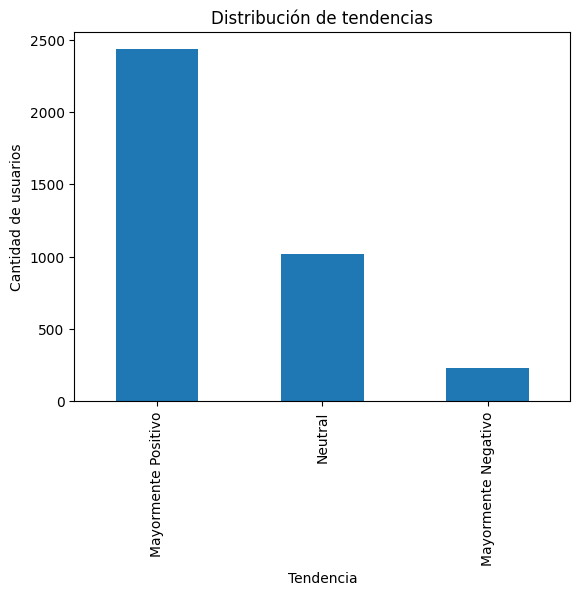

In [21]:
#visualizar distribución de las recomendaciones
rec_pattern['tendency'].value_counts().plot(kind='bar')

plt.title('Distribución de tendencias')
plt.xlabel('Tendencia')
plt.ylabel('Cantidad de usuarios')

### Identificar sesgos

In [22]:
# Proporción de recomendaciones por usuario
rec_pattern['positive_ratio'] = rec_pattern['frequency_positive'] / rec_pattern['frequency']

# Analizar la distribución de las recomendaciones positivas
rec_pattern['positive_ratio'].describe()

count    3684.000000
mean        0.652081
std         0.157294
min         0.111111
25%         0.500000
50%         0.666667
75%         0.800000
max         0.900000
Name: positive_ratio, dtype: float64

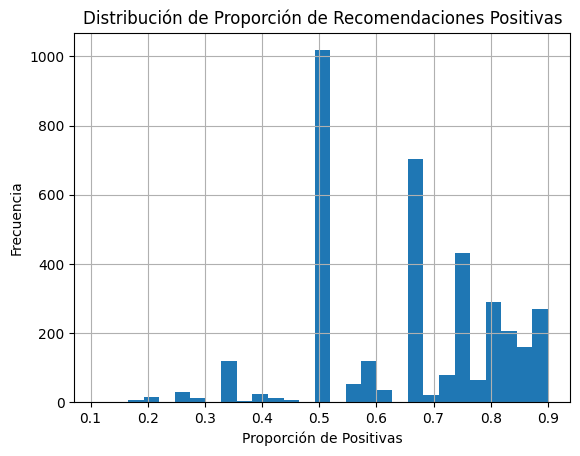

In [23]:
# Visualizar con un histograma
rec_pattern['positive_ratio'].hist(bins=29)
plt.title('Distribución de Proporción de Recomendaciones Positivas')
plt.xlabel('Proporción de Positivas')
plt.ylabel('Frecuencia')
plt.show()

### Análisis por subgrupos de proporción de recomendaciones positivas

Se dividen a los usuarios en grupos según la proporción de recomendaciones positivas que han hecho para identificar  si ciertos grupos tienden a hacer más recomendaciones en general o si existe algún otro patrón.

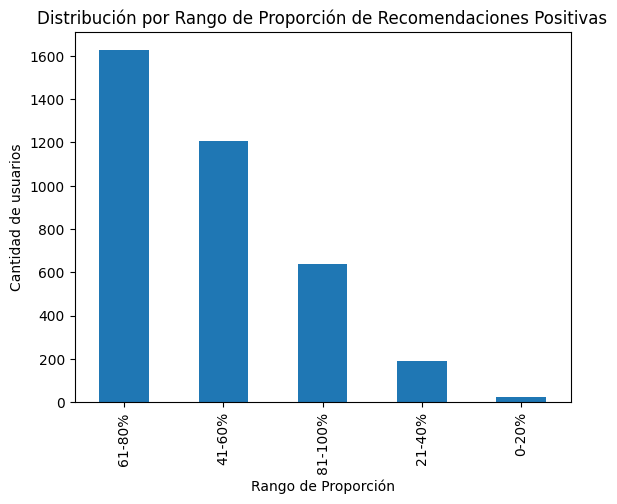

In [24]:
# crear rangos de proporcion para clasificar a los usuario
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

# crear columna que clasifica a los usuarios en rangos
rec_pattern['positive_ratio_range'] = pd.cut(rec_pattern['positive_ratio'], bins=bins, labels=labels)

# visualizar la distribución por rango
rec_pattern['positive_ratio_range'].value_counts().plot(kind='bar')

plt.title('Distribución por Rango de Proporción de Recomendaciones Positivas')
plt.xlabel('Rango de Proporción')
plt.ylabel('Cantidad de usuarios')
plt.show()

### Análisis temporal de sesgos

Se visualiza si la proporción de recomendaciones positivas cambia a lo largo del tiempo.

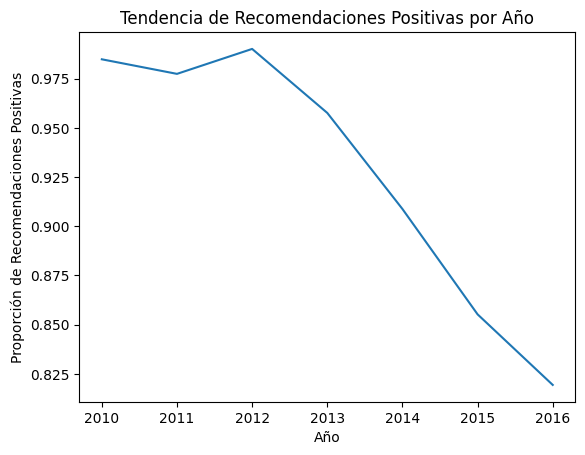

In [25]:
# crear columna con año de la recomendación
df['year'] = df['posted'].dt.year

# Agrupar por año y calcular la proporción de recomendaciones positivas por año
recommendation_trends = df.groupby('year')['recommend'].mean()

# Graficar la tendencia
recommendation_trends.plot(kind='line', title='Tendencia de Recomendaciones Positivas por Año')
plt.xlabel('Año')
plt.ylabel('Proporción de Recomendaciones Positivas')
plt.show()

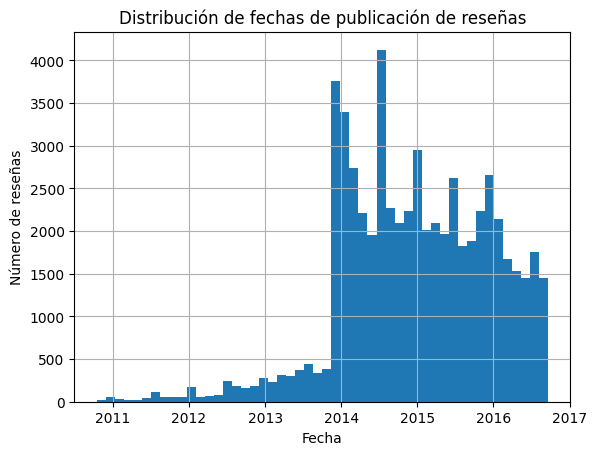

In [27]:
# distribución de las fechas de publicación (posted)
df['posted'].hist(bins=50)
plt.title("Distribución de fechas de publicación de reseñas")
plt.xlabel("Fecha")
plt.ylabel("Número de reseñas")
plt.show()

Se aprecia una importante caíada de recomendaciones a partir del 2012.

### identificación de juegos dominantes

Se analizan los juegos que reciben una mayor cantidad de recomendaciones lo que puede influír en la proporción general. Se buscan juegos muy populares que pueden recibir múltiples recomendaciones positivas sesgando el análisis.

In [60]:
# agrupar por item_id y contar el número de recomendaciones
game_recom = df.groupby('item_id')['recommend'].count()

# ordenar los juegos por cantidad de recomendaciones y mostrar los primeros 10
top_games = game_recom.sort_values(ascending=False)
top_games.head(10)

item_id
730       3759
440       3736
4000      1735
570       1562
218620    1137
304930    1050
252490     815
550        752
105600     741
221100     737
Name: recommend, dtype: int64

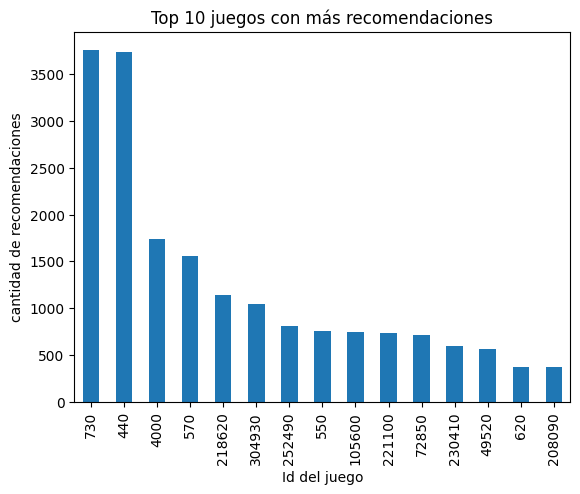

In [61]:
# visualizar los juegos con más recomendaciones
top_games.head(15).plot(kind='bar', title='Top 10 juegos con más recomendaciones')
plt.xlabel('Id del juego')
plt.ylabel('cantidad de recomendaciones')
plt.show()

### Análisis de recomendaciones por cantidad de juegos evaluados

Se analiza si los usuarios que evalúan más juegos tienden a recomendar más positiva o negativamente.

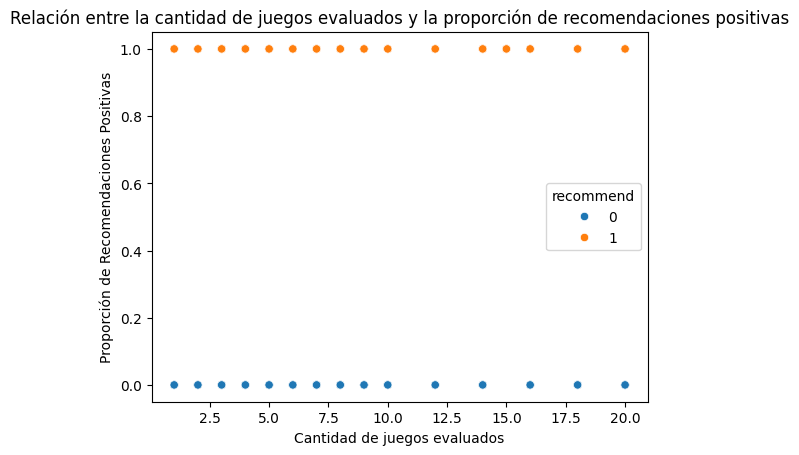

In [50]:
# contar cuántos juegos ha evaluado cada usuario
user_game_count = df.groupby('user_id')['item_id'].count()

# relacionar la cantidad de juegos evaluados con la proporción de recomendaciones positivas
df_merged = df.merge(user_game_count.rename('games_reviewed'), on='user_id')

# graficar relación entre el número de juegos evaluados y la proporción de recomendaciones positivas
sns.scatterplot(data=df_merged, x='games_reviewed', y='recommend', hue='recommend')
plt.title('Relación entre la cantidad de juegos evaluados y la proporción de recomendaciones positivas')
plt.xlabel('Cantidad de juegos evaluados')
plt.ylabel('Proporción de Recomendaciones Positivas')
plt.show()

### Análisis de usuarios con sesgos extremos

Identificar usuarios que tienden a tener proporciones extremas de recomendaciones (casi siempre negativas o positivas) y analizar si estos usuarios están sesgando el análisis global.

In [51]:
# Filtrar usuarios con proporciones menores al 20% o mayores al 80% de recomendaciones positivas
extreme_users = rec_pattern[(rec_pattern['positive_ratio'] > 0.8) | (rec_pattern['positive_ratio'] < 0.2)]

# Contar los usuarios con sesgos extremos
extreme_users.groupby('positive_ratio').size()

positive_ratio
0.111111      1
0.125000      1
0.142857      1
0.166667      5
0.833333    206
0.857143    159
0.875000    111
0.888889     83
0.900000     77
dtype: int64

In [52]:
# ver qué tipo de juegos estos usuarios evalúan
ext_game_recom = pd.merge(extreme_users, df, on='user_id', how='left')
ext_game_recom.head()

,user_id,frequency,frequency_positive,frequency_negative,tendency,positive_ratio,positive_ratio_range,posted,item_id,recommend,review,year
0,76561198094665607,20,18,2,Mayormente Positivo,0.9,81-100%,2014-06-28,204360,1,2,2014
1,76561198094665607,20,18,2,Mayormente Positivo,0.9,81-100%,2013-12-06,1250,1,2,2013
2,76561198094665607,20,18,2,Mayormente Positivo,0.9,81-100%,2013-12-01,224540,1,1,2013
3,76561198094665607,20,18,2,Mayormente Positivo,0.9,81-100%,2013-12-01,10090,1,2,2013
4,76561198094665607,20,18,2,Mayormente Positivo,0.9,81-100%,2016-05-17,312210,0,0,2016


In [53]:
# ver qué tipo de juegos evalúan estos usuarios
ext_game = pd.DataFrame(ext_game_recom.groupby('item_id')['recommend'].count().sort_values(ascending=False))
ext_game.head(10)

,recommend
item_id,
730,163
440,147
4000,142
218620,92
570,77
304930,76
550,70
72850,66
252490,61


In [54]:
# cuántos juegos fueron puntuados por los usuarios con recomendaciones extremas

len(ext_game.groupby('item_id'))

# quizás deba hacerse una limpieza de outliers, para mejorar la precisión del análisis

1200

In [55]:
# Obtener la proporción de recomendaciones positivas por juego
game_recommend_trend = ext_game_recom.groupby('item_id')['recommend'].mean().reset_index()
game_recommend_trend.columns = ['item_id', 'positive_ratio']
game_recommend_trend.sort_values('positive_ratio', ascending=False, inplace=True)
game_recommend_trend.head(10)  # ver los 10 con proporción más alta

,item_id,positive_ratio
0,10,1.0
714,273840,1.0
717,274270,1.0
719,274310,1.0
720,274900,1.0
721,274920,1.0
722,274940,1.0
723,275390,1.0
725,275670,1.0
727,277590,1.0


In [56]:
# Obtener el promedio de recomendaciones de cada usuario
user_recommend_trend = rec_pattern.groupby('user_id')['positive_ratio'].mean().reset_index()
user_recommend_trend.sort_values('positive_ratio', ascending=False).head(10)  # ver los 10 usuarios más positivos
user_recommend_trend.sort_values('positive_ratio', ascending=True).head(10)   # ver los 10 usuarios más negativos

,user_id,positive_ratio
3586,ungstein,0.111111
973,76561198074935997,0.125000
2935,hunterkiller247,0.142857
362,76561198038567931,0.166667
1869,IceBergs,0.166667
1253,76561198093768306,0.166667
787,76561198065711375,0.166667
3185,mummbles1991,0.166667
2770,dogapp,0.200000
1821,Griffsta,0.200000


In [57]:
# Contar las recomendaciones positivas y negativas por juego
positive_negative_counts = ext_game_recom.groupby(['item_id', 'recommend']).size().unstack(fill_value=0)
positive_negative_counts['total'] = positive_negative_counts.sum(axis=1)
positive_negative_counts['polarized_ratio'] = positive_negative_counts[1] / positive_negative_counts['total']
polarized_games = positive_negative_counts[(positive_negative_counts['polarized_ratio'] > 0.4) & 
                                           (positive_negative_counts['polarized_ratio'] < 0.6)]
polarized_games.head(10)

recommend,0,1,total,polarized_ratio
item_id,,,,
11610,1,1,2,0.500000
17080,1,1,2,0.500000
24010,1,1,2,0.500000
24740,1,1,2,0.500000
38720,1,1,2,0.500000
38830,1,1,2,0.500000
42160,2,2,4,0.500000
42680,3,3,6,0.500000
48240,2,2,4,0.500000


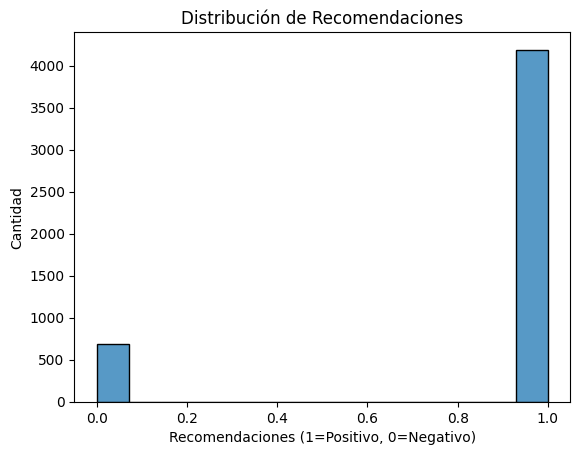

In [62]:
# Graficar la distribución de recomendaciones
sns.histplot(ext_game_recom['recommend'], kde=False)
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendaciones (1=Positivo, 0=Negativo)')
plt.ylabel('Cantidad')
plt.show()

## Conclusiones

#### recommend
- Las recomendaciones de los usuarios están desvalanceadas siendo más frecuente que sean positivas a negativas.
- Entre el 2014 y el 2015 la tendencia a recomendar juegos de forma positiva creció significativamente llegando a su pico máximo pero, a partir de allí, disminuyó rápidamente hasta el año 2016.
- Las recomendaciones negativas se mantuvieron sin cambios significativos hasta el año 2013 donde aumentaron en cantidad hasta el año 2015 y disminuyeron levemente para el 2016.
- Mensualmente puede observarse un decremento pronunciado en las reviews positivas entre Enero y Febrero, luego siguen disminuyendo gradualmente para volver a incrementarse en Junio y luego volver a bajar gradualmente hasta noviembre que aumentan de forma significativa hasta diciembre.
- Mensualmente no se observan cambios significativos en las recomendaciones negativas, pero se observan ligeros incrementos y decrementos correspondientes a las épocas en que las recomendaciones positivas tienen sus cambios.
#### review
- Existe una gran desproporción en la cantidad de reviews positivas, neutras y negativas siendo mayormente positivas.
- La tendencia en el análisis de sentimientos de las reviews con el tiempo sigue los mismos patrones que las recomendaciones tanto positivas como negativas teniendo más variabilidad en los comentarios neutrales que en los negativos.
#### users
- la distribución por rangos de proporciones de recomendaciones positivas indica que la mayoría de los usuarios tienden a hacer entre un 61-80% de recomendaciones positivas y la minoría realiza menos del 20%.
- la proporción de recomendaciones positivas de los usuarios (media de recomendaciones positivas por año) sufren una constante caída desde el año 2012.
- Los usuarios con proporciones extremas de recomendaciones (casi siempre negativas o positivas) evaluan 1.76 juegos en promedio. Esto puede estar sesgando el análisis global, ya que algunos usuarios pueden tener una tendencia mucho más fuerte a recomendar juegos negativos o positivos que otros no.
#### item_id
- Los juegos con los id 730 y 440 evidentemente han recibido muchas recomendaciones, lo que indica que son juegos conocidos y populares pero que pueden sesgar el análisis por ser tan desnivelados.